###### Credit : superdatascience.com

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Movie_Ratings.csv')

In [3]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [5]:
df.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [6]:
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')
df.Year = df.Year.astype('category')

## Visualization

##### Relationship between Critic Rating and Audience Rating

Text(0.5, 1.2, 'Critic Rating vs Audience Rating')

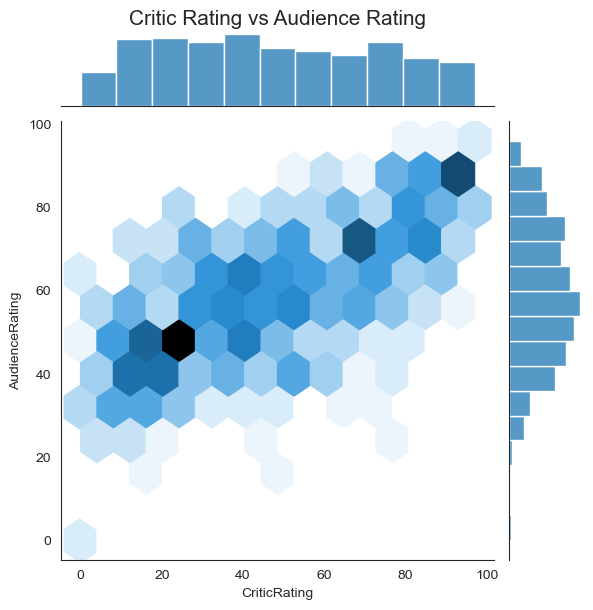

In [25]:
sns.jointplot(df, x = 'CriticRating', y = 'AudienceRating', kind = 'hex')
plt.title('Critic Rating vs Audience Rating', y = 1.2, fontsize = 15)

In [26]:
sns.set_style('darkgrid')

##### Audience Rating Distribution

Text(0.5, 1.0, 'Audience Rating Distribution')

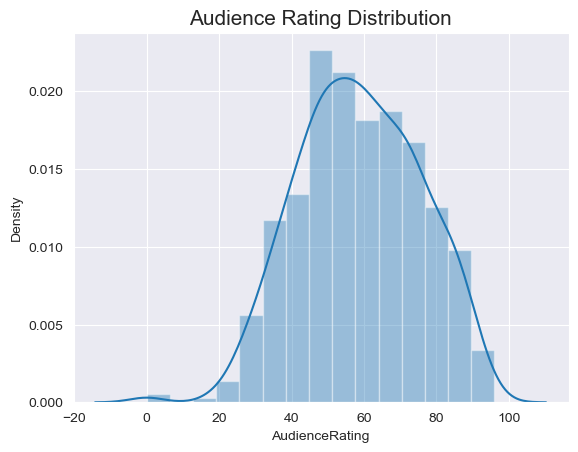

In [37]:
sns.distplot(df.AudienceRating, bins = 15)
plt.title('Audience Rating Distribution', fontsize = 15)

Text(0.5, 1.0, 'Critic Rating Distribution')

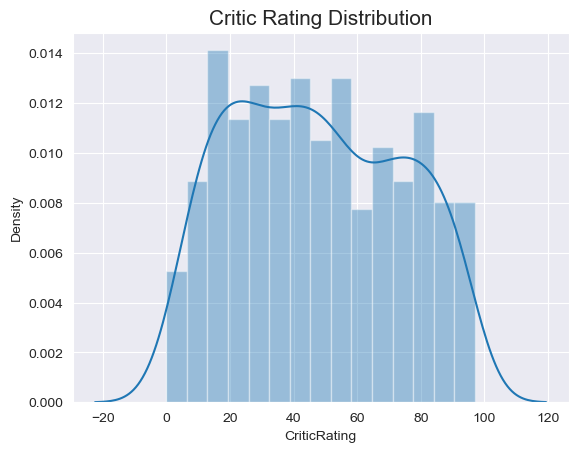

In [39]:
sns.distplot(df.CriticRating, bins = 15)
plt.title('Critic Rating Distribution', fontsize = 15)
# Close to uniform distribution for critic ratings

##### Budget (USD Million) by Genre

In [55]:
plt.rcParams['figure.figsize'] = 10, 7

In [43]:
df.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [45]:
genre = list()
genre_label = list()
for gen in df.Genre.cat.categories :
    genre.append(df[df['Genre'] == gen]['BudgetMillions'])
    genre_label.append(gen)

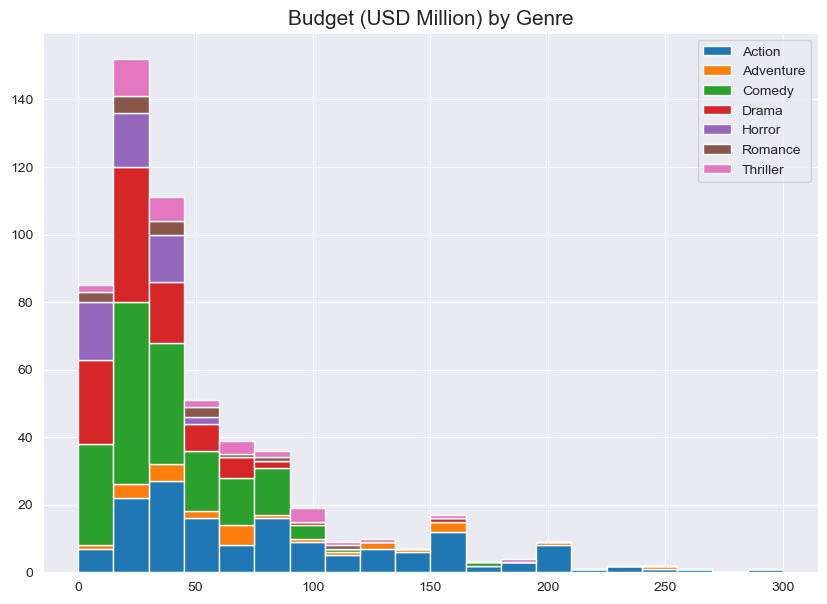

In [58]:
plt.hist(genre, bins = 20, stacked = True, rwidth = 1,
        label = genre_label)

plt.legend()
plt.title('Budget (USD Million) by Genre', fontsize = 15)
plt.show()

##### KDE Plot of Critic Rating vs Audience Rating

Text(0.5, 1.0, 'Critic Rating vs Audience Rating')

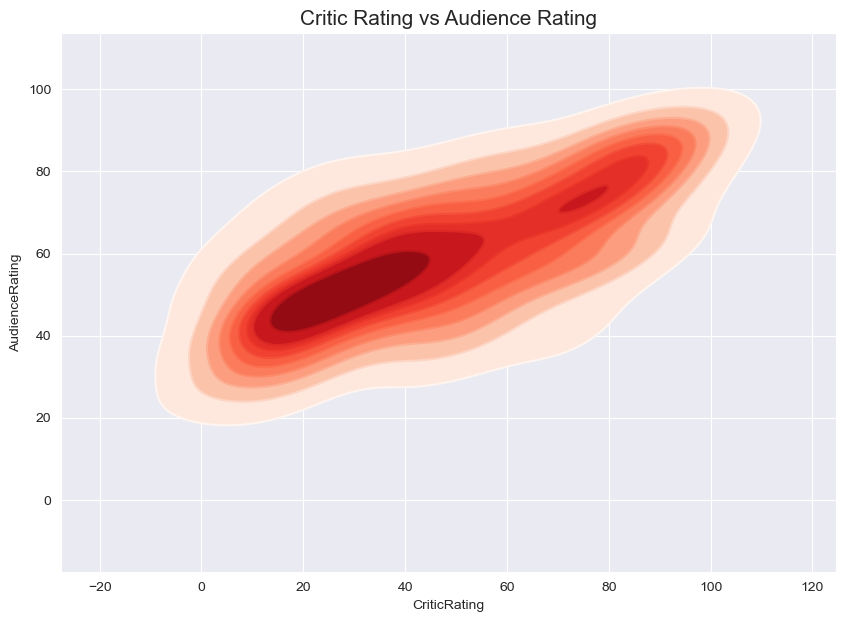

In [60]:
k1 = sns.kdeplot(x = df.CriticRating, y = df.AudienceRating, shade = True, shade_lowest = False,
                 cmap = 'Reds')
# Code for outline :
k1b = sns.kdeplot(x = df.CriticRating, y = df.AudienceRating, cmap = 'Reds')

plt.title('Critic Rating vs Audience Rating', fontsize = 15)

##### Relationship between Budget and Ratings

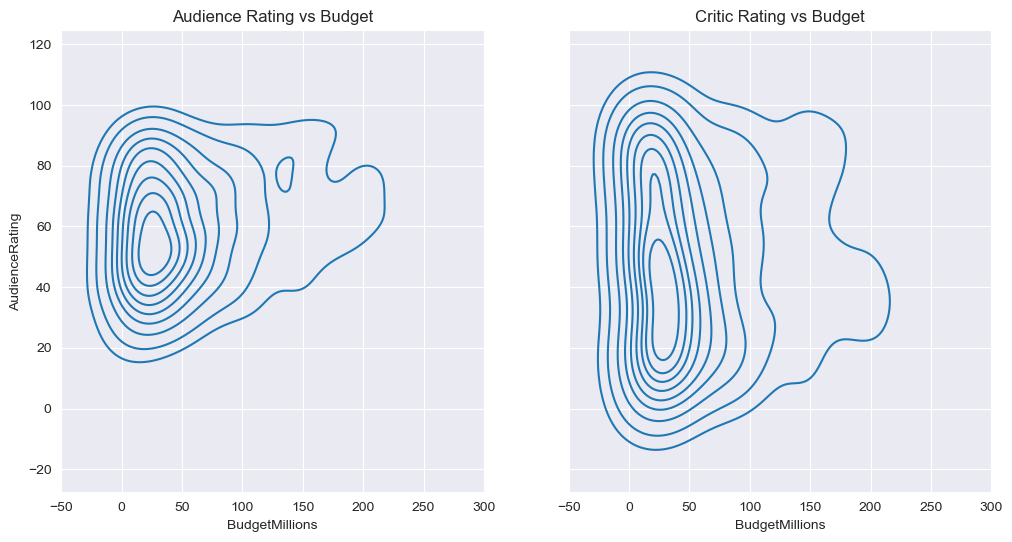

In [74]:
f, axes = plt.subplots(1, 2, figsize = (12, 6), sharex = True,  sharey = True)
k1 = sns.kdeplot(x = df.BudgetMillions, y = df.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(x = df.BudgetMillions, y = df.CriticRating, ax = axes[1])
k1.set(xlim = (-50, 300))

k1.title.set_text('Audience Rating vs Budget')
k2.title.set_text('Critic Rating vs Budget')

##### Critic Rating by Genre

<Axes: xlabel='Genre', ylabel='CriticRating'>

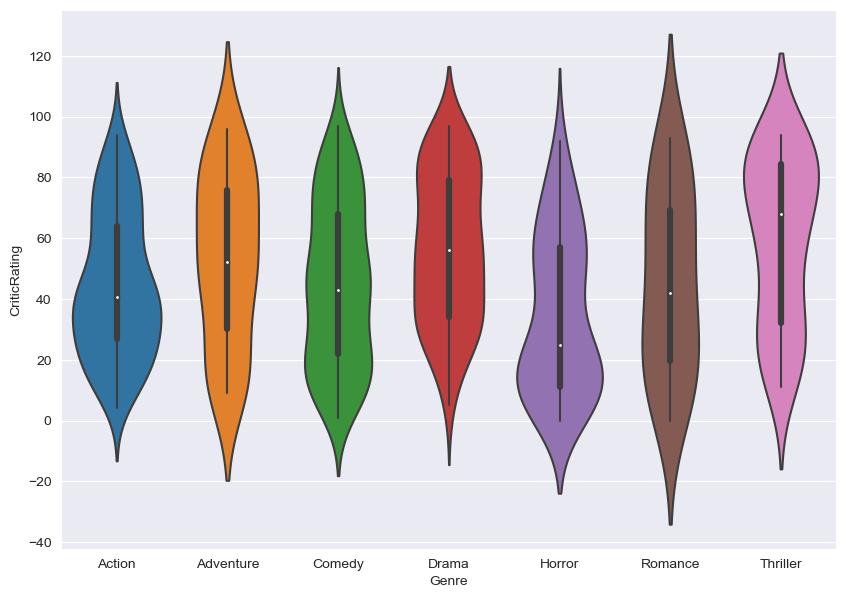

In [76]:
sns.violinplot(df, x = 'Genre', y = 'CriticRating')

##### Audience Rating by Genre and Year

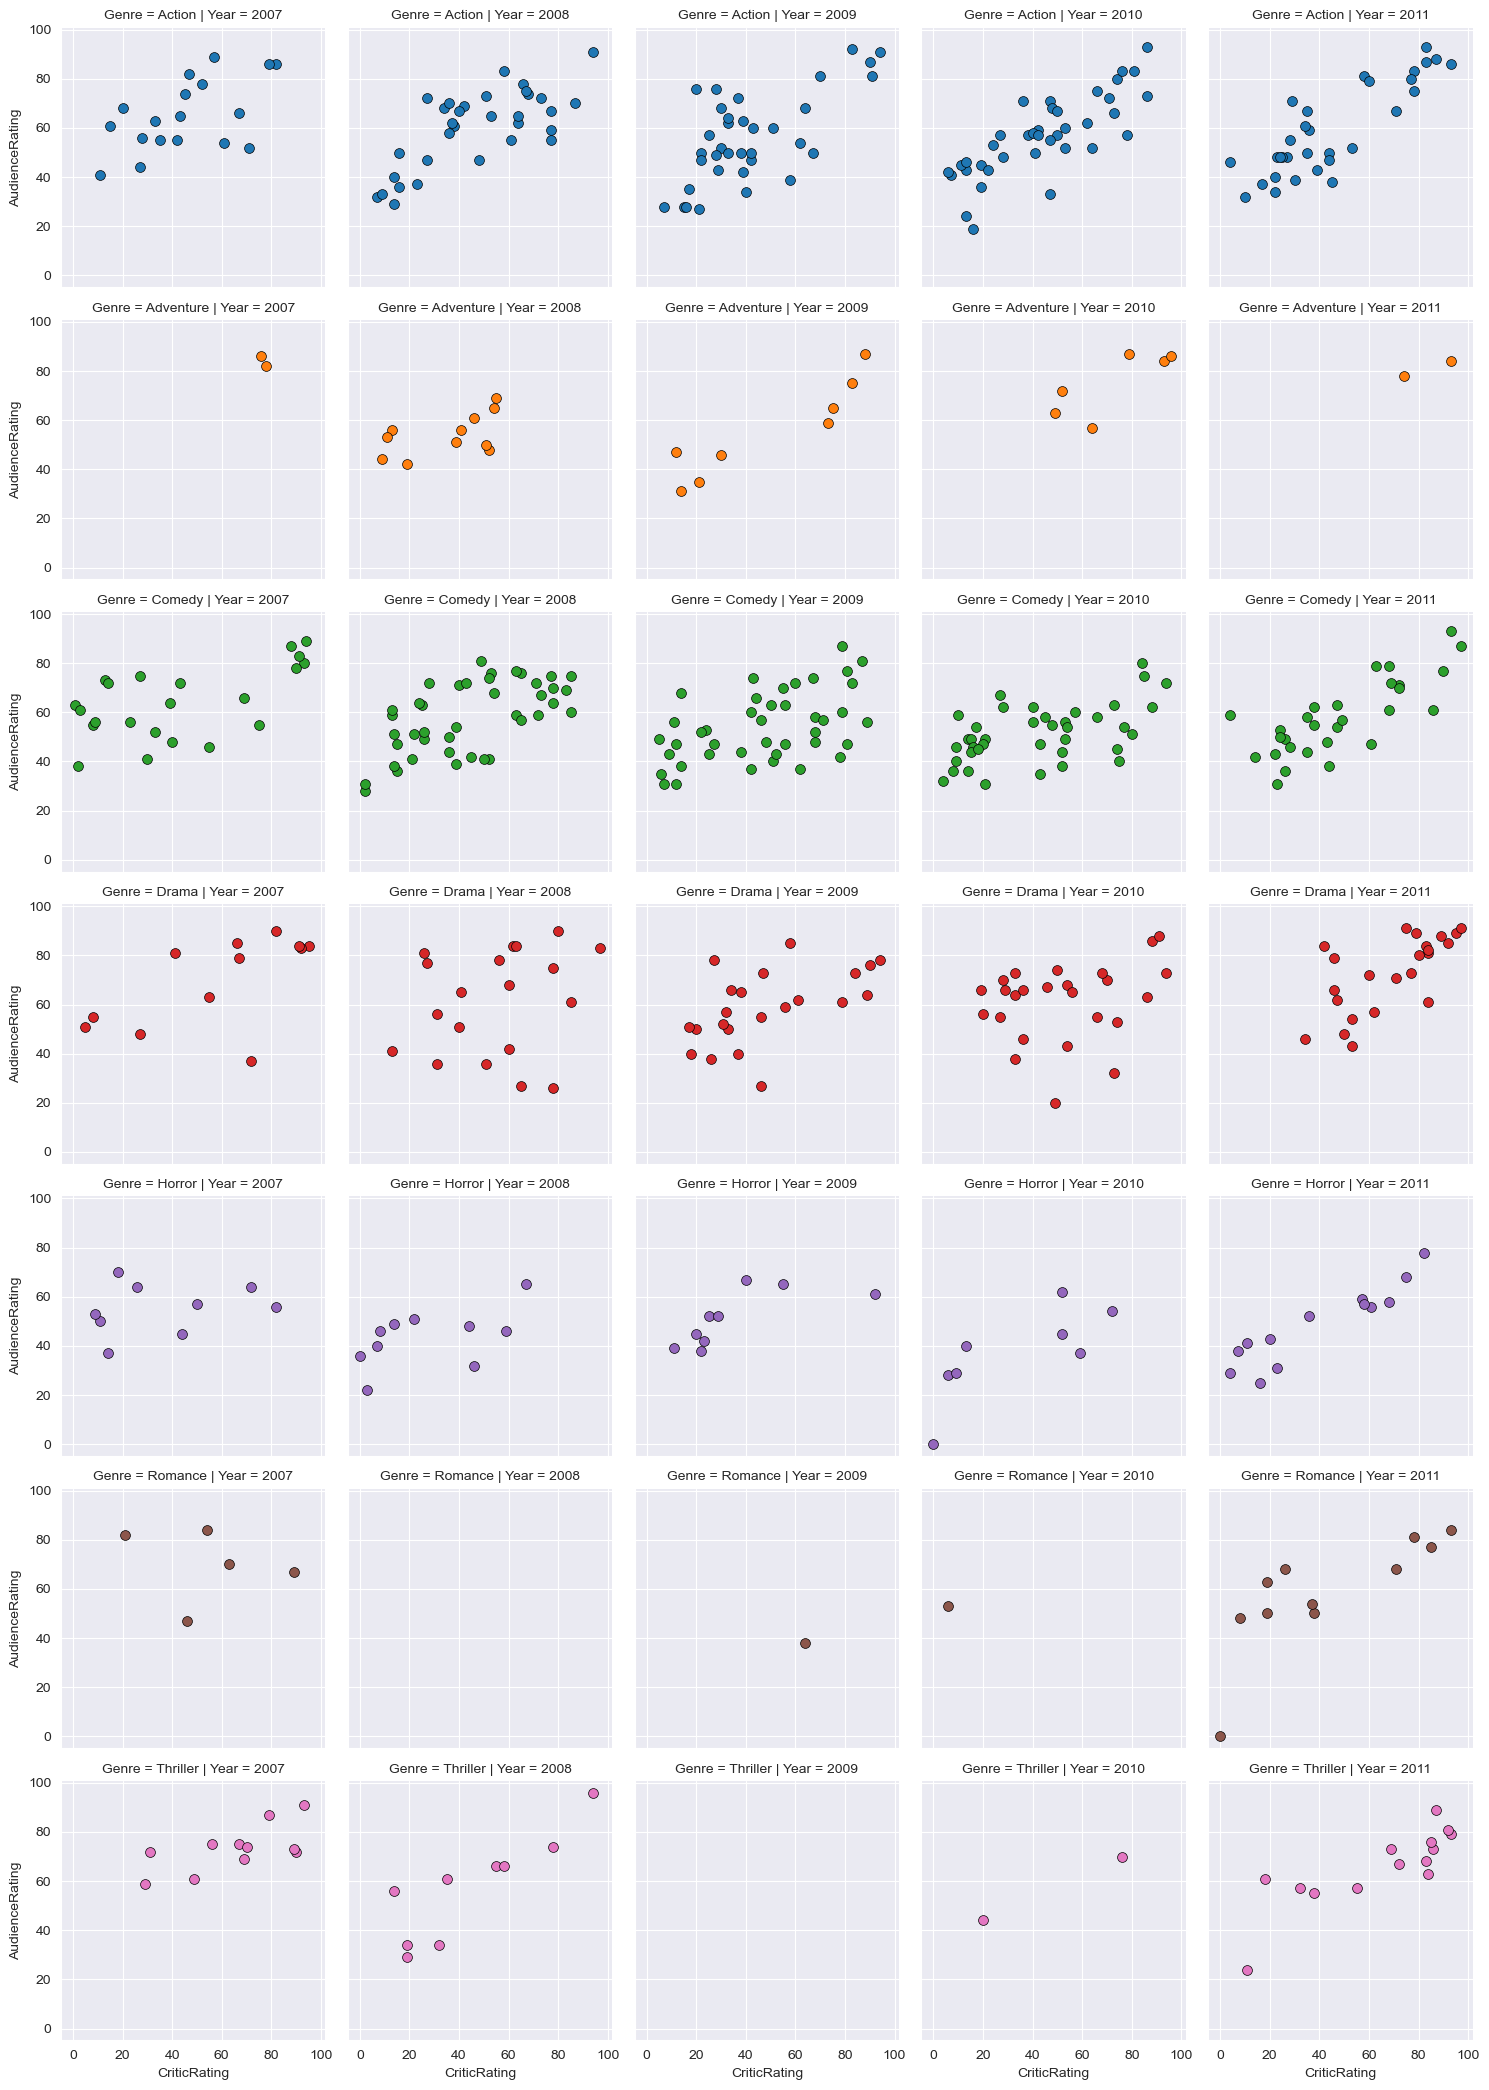

In [79]:
g = sns.FacetGrid(df, row = 'Genre', col = 'Year', hue = 'Genre')
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

##### Summary

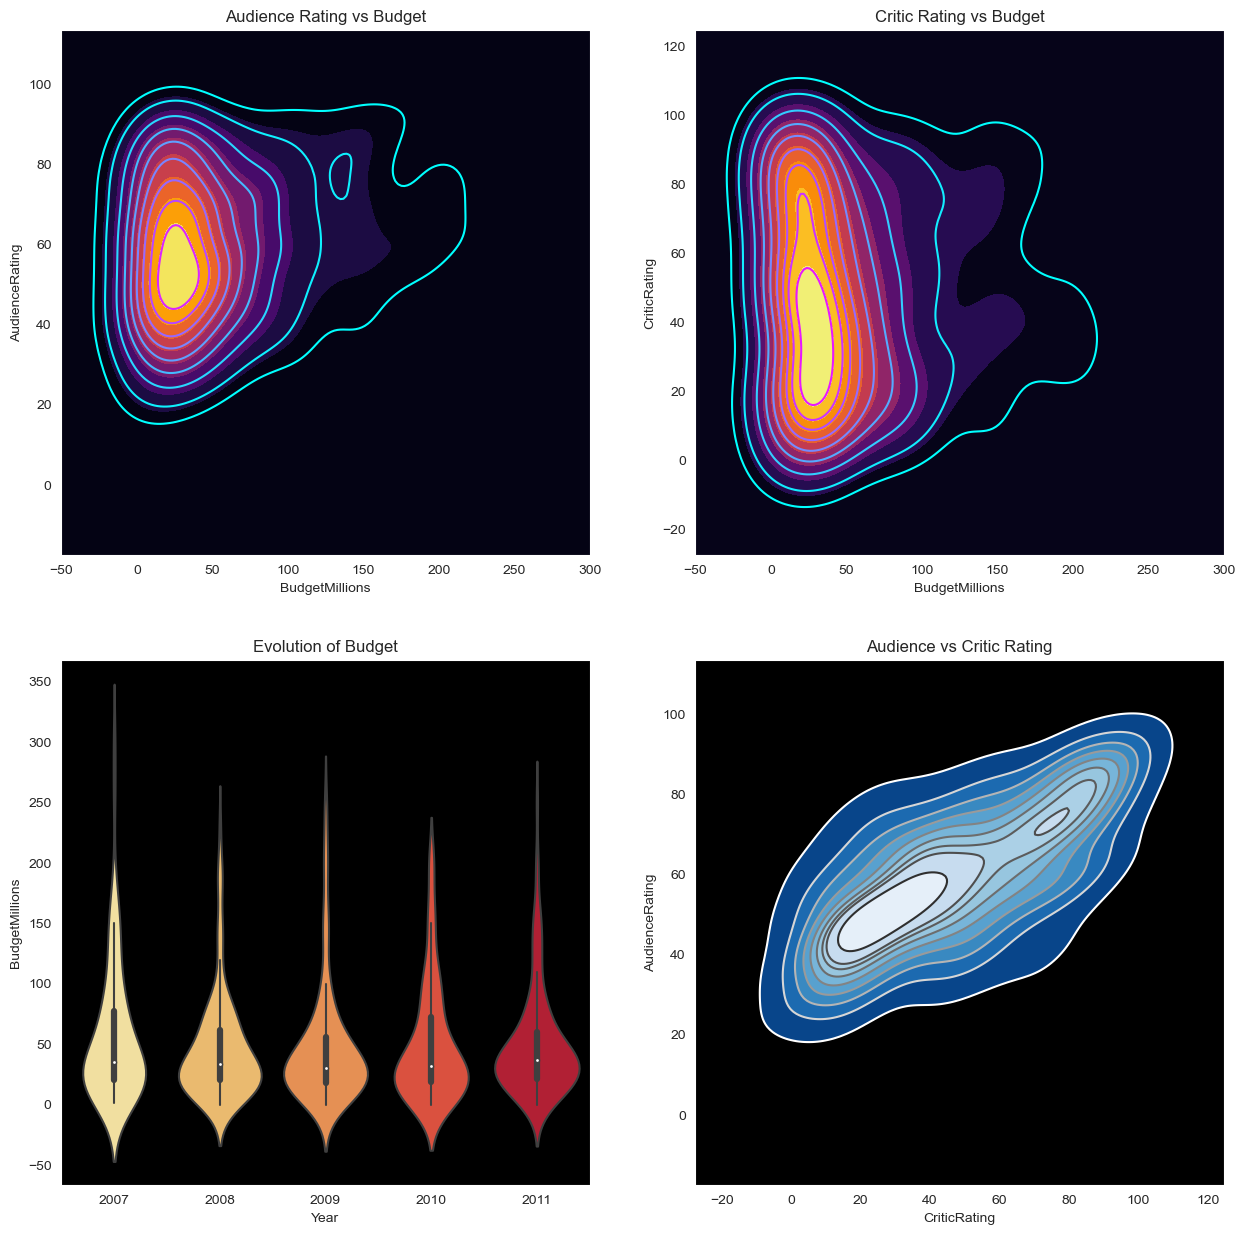

In [84]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize=(15, 15))

#Plot [0,0]
k1 = sns.kdeplot(x = df.BudgetMillions, y = df.AudienceRating,
                 shade = True, shade_lowest = True, cmap = 'inferno', ax = axes[0,0])
k1b = sns.kdeplot(x = df.BudgetMillions, y = df.AudienceRating, cmap = 'cool', ax = axes[0,0])

#Plot [0,1]
k2 = sns.kdeplot(x = df.BudgetMillions, y = df.CriticRating,
                 shade = True, shade_lowest = True, cmap = 'inferno', ax = axes[0,1])
k2b = sns.kdeplot(x = df.BudgetMillions, y = df.CriticRating, cmap = 'cool', ax = axes[0,1])

#Plot [1,0]
z1 = sns.violinplot(data = df, x = 'Year', y = 'BudgetMillions',
                    palette = 'YlOrRd', ax = axes[1,0])

#Plot [1,1]
k4 = sns.kdeplot(x = df.CriticRating, y = df.AudienceRating, shade = True,
                 shade_lowest = False, cmap = 'Blues_r', ax = axes[1,1])
k4b = sns.kdeplot(x = df.CriticRating, y = df.AudienceRating, cmap = 'gist_gray_r', ax = axes[1,1])

k1.set(xlim = (-50, 300))
k2.set(xlim = (-50, 300))

k1.title.set_text('Audience Rating vs Budget')
k2.title.set_text('Critic Rating vs Budget')
z1.title.set_text('Evolution of Budget')
k4.title.set_text('Audience vs Critic Rating')

plt.show()

## Box Office Data

In [86]:
df2 = pd.read_csv('Box_Office.csv', encoding = 'latin1')

In [87]:
df2.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [89]:
df2.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


## Visualisation

##### Domestic Gross % by Genre & Studio

In [92]:
df2['Studio'].unique()

array(['Buena Vista Studios', 'Lionsgate', 'Sony', 'Universal',
       'Paramount Pictures', 'WB', 'Weinstein Company',
       'UA Entertainment', 'WB/New Line', 'New Line Cinema', 'Fox',
       'TriStar', 'Relativity Media', 'Screen Gems', 'StudioCanal',
       'Fox Searchlight Pictures', 'MiraMax', 'Path_ Distribution',
       'DreamWorks', 'Lionsgate Films', 'Revolution Studios',
       'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)

In [93]:
df2['Genre'].unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [99]:
genre_filtered = df2[df2.Genre.isin(['action', 'adventure', 'animation', 'comedy', 'drama'])]
studio_filtered = genre_filtered[genre_filtered.Studio.isin(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal', 'WB'])]

In [100]:
print(genre_filtered['Genre'].unique())
print(studio_filtered['Studio'].unique())

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


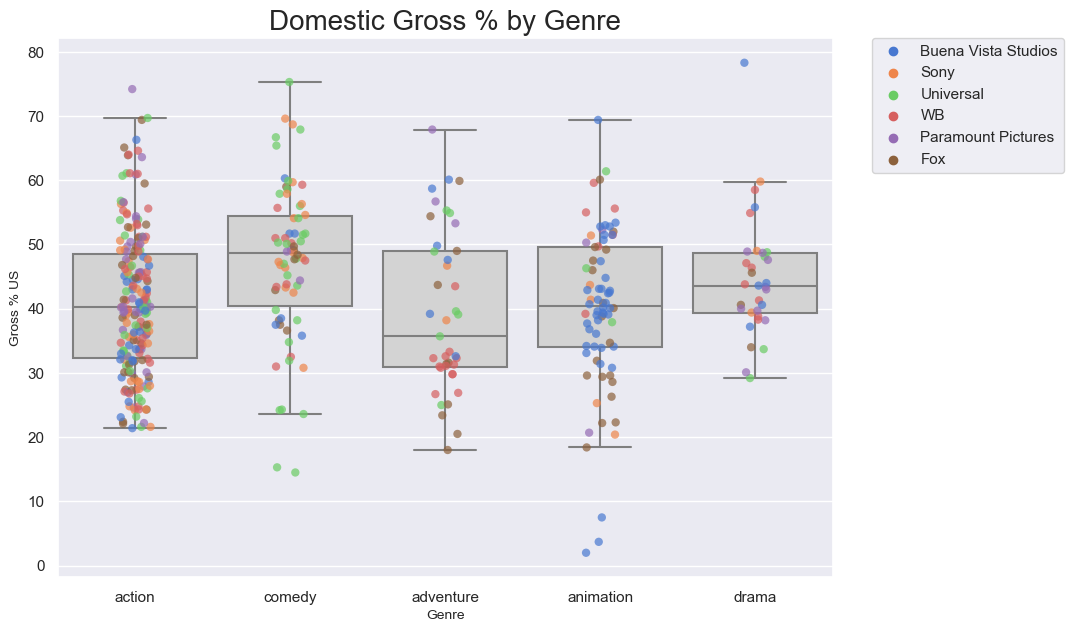

In [102]:
sns.set(palette = 'muted', color_codes = True)

# Boxplot
ax = sns.boxplot(studio_filtered, x = 'Genre', y = 'Gross % US', orient = 'v',
                 color = 'lightgray', showfliers = False)
plt.setp(ax.artists, alpha = 0.5)

# Points of each observation
sns.stripplot(studio_filtered, x = 'Genre', y = 'Gross % US',
              jitter = True, size = 6, linewidth = 0, hue = 'Studio', alpha = 0.7)

ax.axes.set_title('Domestic Gross % by Genre', fontsize = 20)
ax.set_xlabel('Genre', fontsize = 10)
ax.set_ylabel('Gross % US', fontsize = 10)

# Legend
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()